In [3]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle
from sklearn.metrics import accuracy_score
import joblib

In [126]:
type_mask=('with_mask','without_mask')

In [127]:
path ='C:/Users/ACER/Desktop/Machine_Learning_Project/Dataset2'
list_pic=[]
label_pic=[]
for type_mask in os.listdir(path):
    y=os.path.join(path,type_mask)
    for z in os.listdir(y):
        path_pic=os.path.join(y,z)
        img=cv2.imread(path_pic)
        gray_pic=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        list_pic.append(gray_pic)
        label_pic.append(type_mask)

In [128]:
with_mask_count = 0
without_mask_count = 0

# Iterate over each label in the list
for label in label_pic:
    if label == 'with_mask':
        with_mask_count += 1
    elif label == 'without_mask':
        without_mask_count += 1

In [129]:
with_mask_count,without_mask_count

(2994, 1419)

<BarContainer object of 2 artists>

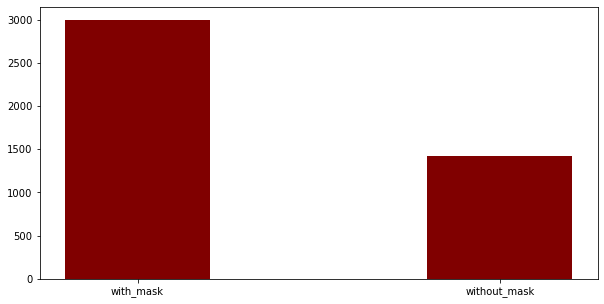

In [130]:
data={'with_mask':with_mask_count,'without_mask':without_mask_count}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)

## Handle with imbalance data

In [131]:
list_pic = np.array(list_pic)

# Reshape input data to 2D array
list_pic_2d = list_pic.reshape(list_pic.shape[0], -1)

In [132]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [133]:
X_sm,y_sm=sm.fit_resample(list_pic_2d,label_pic)

In [134]:
np.shape(X_sm)

(5988, 16384)

In [137]:
y_sm

['without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask

In [138]:
with_mask_count_after_smote = 0
without_mask_count_after_smote = 0

# Iterate over each label in the list
for label in y_sm:
    if label == 'with_mask':
        with_mask_count_after_smote += 1
    elif label == 'without_mask':
        without_mask_count_after_smote += 1

<BarContainer object of 2 artists>

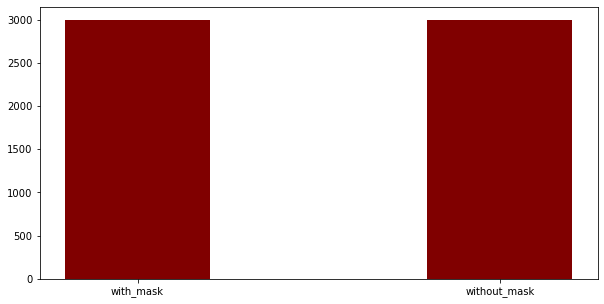

In [139]:
new_data={'with_mask':with_mask_count_after_smote,'without_mask':without_mask_count_after_smote}
new_1= list(new_data.keys())
new_2 = list(new_data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(new_1, new_2, color ='maroon',
        width = 0.4)

### Train model

In [84]:
height = 128
width = 128

# Reshape the 2D array to its original shape
input_data_original = X_sm.reshape(X_sm.shape[0], height, width)

In [85]:
train_hog_features=[]

orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)




for image in input_data_original:
        hog_features = hog(image ,orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, feature_vector=True)
        train_hog_features.append(hog_features)
train_hog_features = np.array(train_hog_features)



In [86]:
X_train,X_test,y_train,y_test=train_test_split(train_hog_features,y_sm,test_size=0.3)

In [87]:
clf = SVC(probability=True)
clf.fit(train_hog_features, y_sm)

SVC(probability=True)

In [88]:
y_predict=clf.predict(X_test)

In [90]:
score=accuracy_score(y_predict,y_test)
score

0.9961046188091264

In [92]:
from sklearn.metrics import classification_report

In [93]:
def print_score(y_true,y_pred):
    print(classification_report(y_true,y_pred))
    

In [94]:
print_score(y_test,y_predict)

              precision    recall  f1-score   support

   with_mask       0.99      1.00      1.00       910
without_mask       1.00      0.99      1.00       887

    accuracy                           1.00      1797
   macro avg       1.00      1.00      1.00      1797
weighted avg       1.00      1.00      1.00      1797



In [2]:
import joblib

joblib.dump(clf, "mask_with_imbalance_data.joblib")

NameError: name 'clf' is not defined

In [4]:
model=joblib.load("mask_with_imbalance_data.joblib")

## Test on camera

In [5]:
def extract(img):
    orientations = 9
    pixels_per_cell = (8, 8)
    cells_per_block = (2, 2)
    hog_features = hog(img, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, feature_vector=True)
   
    return hog_features

In [6]:
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8



In [7]:
#url="http://10.4.77.84:4747/video"

In [7]:


face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


cap = cv2.VideoCapture(0)


while True:
    flag,img = cap.read()


  

    faces = face_cascade.detectMultiScale(img, 1.1, 6)

   
    for(x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 250), 2)
        img_train=img[y:y+h,x:x+w,:]
        img_train=cv2.resize(img_train,(128,128))
        img_train = cv2.cvtColor(img_train, cv2.COLOR_BGR2GRAY)
        feature= extract(img_train)
        a=model.predict(np.array(feature).reshape(1,-1))
        print(a)
        if a=='with_mask':
            cv2.putText(img, 'mask_detected', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        else:
            cv2.putText(img, 'non_mask_detected', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    cv2.imshow('Detected Mask Image',  img)

   
    k = cv2.waitKey(1) & 0xff
    if k == 27:
        break


cap.release()

['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['with_mask']
['without_mask']
['with_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['with_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_mask']
['without_

## Tét on video

In [8]:
capture=cv2.VideoCapture('video2.mp4')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
cv2.namedWindow('Video', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Video', 640, 480)
while True:
    flag,img=capture.read()
    faces = face_cascade.detectMultiScale(img, 
                                 scaleFactor=1.05,
                                 minNeighbors=5)

   
    for(x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 250), 2)
        img_train=img[y:y+h,x:x+w,:]
        img_train=cv2.resize(img_train,(128,128))
        img_train = cv2.cvtColor(img_train, cv2.COLOR_BGR2GRAY)
        feature= extract(img_train)
        a=model.predict(np.array(feature).reshape(1,-1))
        print(a)
        if a=='with_mask':
            cv2.putText(img, 'mask_detected', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        else:
            cv2.putText(img, 'non_mask_detected', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    cv2.imshow('Video',img)
    if cv2.waitKey(20) & 0xFF==ord('d'):
        # if letter d is press then video will turn off
        break
capture.release()
cv2.destroyAllWindows()

['with_mask']
['with_mask']
['with_mask']
['with_mask']
['without_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['without_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['without_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['without_mask']
['without_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['without_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['without_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['without_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mas

['without_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['without_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['without_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['without_mask']
['without_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['without_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['without_mask']
['without_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['without_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['with_mask']
['without_mask']
['wi